# MNIST

## MNIST 데이터 셋 다운

In [27]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

## 데이터 형태 확인

In [28]:
# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


## 데이터 이미지로 확인

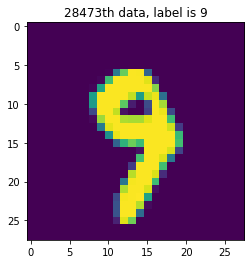

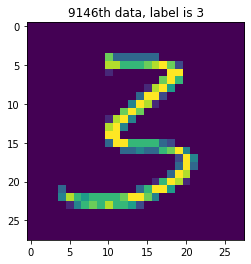

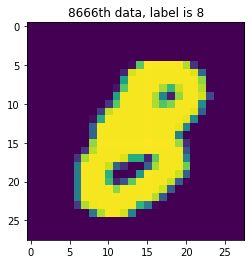

In [29]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
random_idx = np.random.randint(60000, size=sample_size) # 0~59999 범위에서 샘플 사이즈만큼 정수 랜덤 생성

for idx in random_idx:
    img = x_train[idx,:]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title(f'{idx}th data, label is {label}')

## 검증 데이터 생성

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(f'훈련 데이터 형태 : {x_train.shape}, 훈련 라벨 형태 : {y_train.shape}')
print(f'검증 데이터 형태 : {x_val.shape}, 검증 라벨 형태 : {y_val.shape}')

훈련 데이터 형태 : (42000, 28, 28), 훈련 라벨 형태 : (42000,)
검증 데이터 형태 : (18000, 28, 28), 검증 라벨 형태 : (18000,)


## 모델에 input으로 사용하기 위한 데이터 전처리

In [31]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모든 입력 속성 데이터에 대해 아래 과정 수행
# 2차원을 1차원으로 차원 축소
# 최대값인 255로 나눠줌(스케일링)

x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28))) / 255

In [32]:
print(x_train.shape)

(42000, 784)


In [33]:
# 모든 입력 label 데이터에 대해 범주화 수행
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 모델 구성

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

## 소프트맥스와 시그모이드 비교

In [39]:
def softmax(arr):
    m = np.max(arr)
    arr = arr-m # 오버플로우 방지
    arr = np.exp(arr)
    return arr/np.sum(arr)

def sigmoid(x):
    return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # 소수점 3자리까지
print(f'sigmoid{sigmoid(case_1)}, softmax{softmax(case_1)}')
print(f'sigmoid{sigmoid(case_2)}, softmax{softmax(case_2)}')

# 시그모이드의 경우, 특정 값 아래에서 0에가까워지지만
# 소프트맥스의 경우, 0에 가까워지지 않음

sigmoid[0.957 0.953 0.948], softmax[0.367 0.332 0.301]
sigmoid[0.881 0.731 0.668], softmax[0.61  0.224 0.166]


## 모델 컴파일 및 학습

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.4990 - accuracy: 0.8582 - val_loss: 0.2540 - val_accuracy: 0.9272
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2117 - accuracy: 0.9399 - val_loss: 0.1830 - val_accuracy: 0.9473
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1595 - accuracy: 0.9543 - val_loss: 0.1533 - val_accuracy: 0.9567
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1280 - accuracy: 0.9634 - val_loss: 0.1398 - val_accuracy: 0.9585
Epoch 5/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 0.1273 - val_accuracy: 0.9624
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0915 - accuracy: 0.9736 - val_loss: 0.1216 - val_accuracy: 0.9632
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.1152 - val_accuracy: 0.9646
Epoch 

## 학습 결과 확인

In [37]:
history.history.keys() # history를 통해 확인해볼 수 있는 값 출력

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

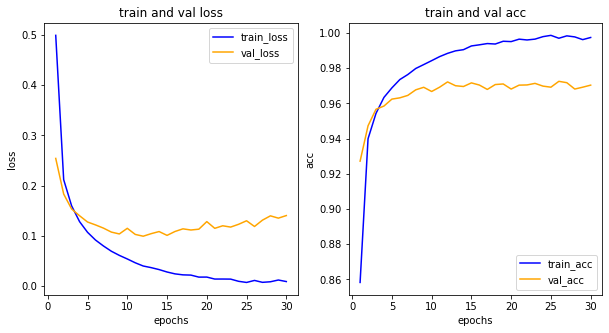

In [43]:
his_dict = history.history

loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, c='b', label='train_loss')
ax1.plot(epochs, val_loss, c='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

epochs = range(1, len(loss)+1)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, c='b', label='train_acc')
ax2.plot(epochs, val_acc, c='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가

In [45]:
model.evaluate(x_test, y_test) # 테스트 데이터를 사용해 loss와 acc 계산

313/313 [==============================] - 1s 4ms/step - loss: 0.1365 - accuracy: 0.9704


[0.13648152351379395, 0.9703999757766724]

## 예측

In [48]:
results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'첫 번째 테스트 데이터가 각 클래스에 속할 확률 : {results[0]}')

(10000, 10)
첫 번째 테스트 데이터가 각 클래스에 속할 확률 : [9.1529291e-11 1.4090547e-15 5.6515727e-08 9.1109614e-05 2.5170458e-13
 2.4126761e-14 6.3394346e-25 9.9990523e-01 5.0566706e-09 3.5849973e-06]


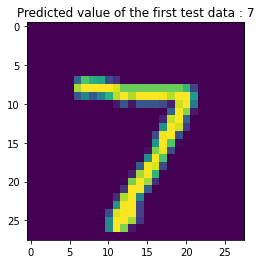

In [49]:
# 그래프로 확인해보기
arg_results = np.argmax(results, axis=-1)
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first test data : '+str(arg_results[0]))
plt.show()

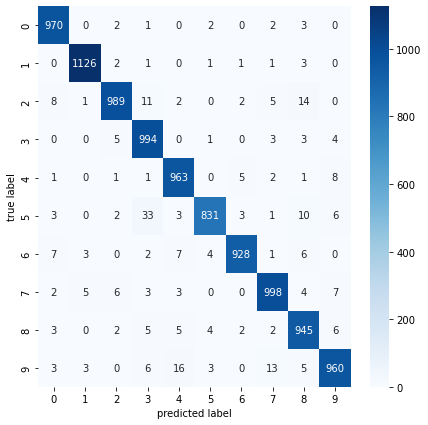

In [50]:
# 다른 모델 평가(소프트맥스를 통해 출력된 결과값을 argmax로 0,1로 변환한 뒤 혼동행렬 확인)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results,axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [52]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results,axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.93      0.96       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Fashion-MNIST

## Fashion MNIST 데이터 셋 다운

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4431872/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


## 데이터 확인

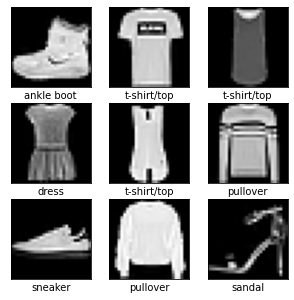

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) # 시드값 고정

class_names = ['t-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([]) # 축에 값 미표시
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray') # 흑백으로 표시
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 데이터 전처리 및 검증 데이터셋 분할

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# 스케일링
x_train = x_train / 255
x_test = x_test / 255

# 라벨 범주화
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋 분할
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

## 첫 번째 모델 구성

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_1 = Sequential()
model_1.add(Flatten(input_shape=(28,28))) # 전처리과정에서 1차원으로 축소안하고 모델에서 1차원으로 변경
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

## 모델 컴파일 및 학습

In [15]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6526 - accuracy: 0.7743 - val_loss: 0.5340 - val_accuracy: 0.8137
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4415 - accuracy: 0.8460 - val_loss: 0.4089 - val_accuracy: 0.8591
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.8575 - val_loss: 0.3878 - val_accuracy: 0.8653
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3732 - accuracy: 0.8675 - val_loss: 0.3965 - val_accuracy: 0.8578
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3491 - accuracy: 0.8748 - val_loss: 0.3866 - val_accuracy: 0.8652
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3343 - accuracy: 0.8790 - val_loss: 0.3693 - val_accuracy: 0.8689
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3230 - accuracy: 0.8828 - val_loss: 0.3498 - val_accuracy: 0.8763
Epoch 

## 두 번째 모델 구성, 컴파일, 학습

In [16]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6178 - accuracy: 0.7895 - val_loss: 0.4824 - val_accuracy: 0.8249
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4210 - accuracy: 0.8494 - val_loss: 0.3908 - val_accuracy: 0.8617
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3735 - accuracy: 0.8642 - val_loss: 0.4015 - val_accuracy: 0.8544
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3464 - accuracy: 0.8735 - val_loss: 0.3629 - val_accuracy: 0.8707
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3230 - accuracy: 0.8815 - val_loss: 0.3409 - val_accuracy: 0.8776
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3047 - accuracy: 0.8877 - val_loss: 0.3303 - val_accuracy: 0.8812
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2925 - accuracy: 0.8913 - val_loss: 0.3484 - val_accuracy: 0.8761
Epoch 

## 두 개의 모델 학습 과정 시각화

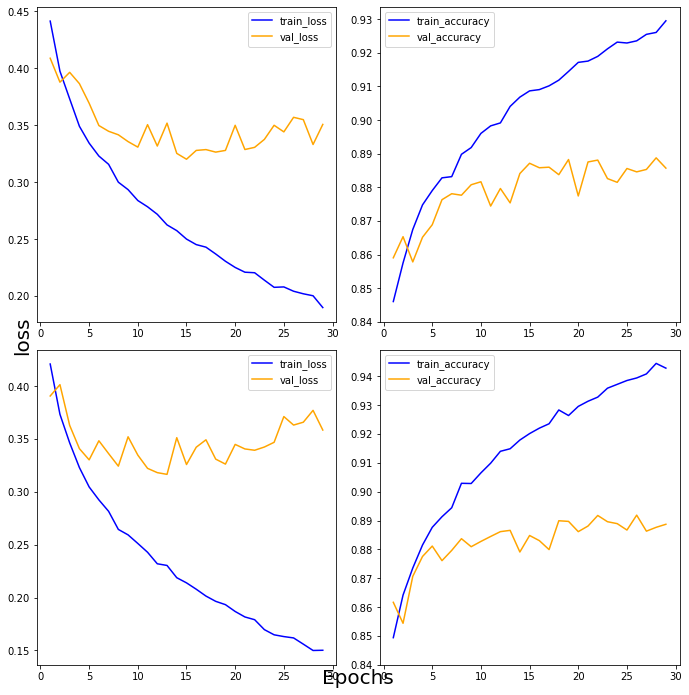

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(hist_1, hist_2, epochs):
    his_dict_1 = hist_1.history # 첫번째 모델의 loss, acc, val_loss, val_acc 저장
    his_dict_2 = hist_2.history # 두번째 모델의 loss, acc, val_loss, val_acc 저장
    keys = list(his_dict_1.keys()) # loss, acc, val_loss, val_acc 문자열 리스트로 저장(2도 동일하기 때문에 굳이 따로 저장하지 않음)
    
    epochs = range(1, epochs) # x축 범위로 지정될 반복 횟수
    
    fig = plt.figure(figsize=(10,10)) # 그래프 사이즈 지정
    # 각 서브플롯이 아닌 전체에 대해 축 선과 레이블 제거
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')    # 축 선 색상 없애기
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(top=False, bottom=False, left=False, right=False, # 책에서는 없애는게 아니라 하얀색으로 바꿨음 > 안보이는 척일뿐
                    labeltop=False, labelbottom=False, labelleft=False, labelright=False) # 진짜 없애기
    
    for i in range(len(his_dict_1)): 
        temp_ax = fig.add_subplot(2,2,i+1)
        temp = keys[i%2] # train은 각 1,2번째 
        val_temp = keys[(i+2)%2+2] # val은 3,4번째이므로
        temp_history = his_dict_1 if i<2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],color='b', label='train_'+temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],color='orange', label=val_temp)
        if (i==1 or i==3): # accracy에 대해 y 축 설정
            start,end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
   
draw_loss_acc(history_1,history_2,30)

### 좀 더 직관적이게 시각화 코드 짜보기

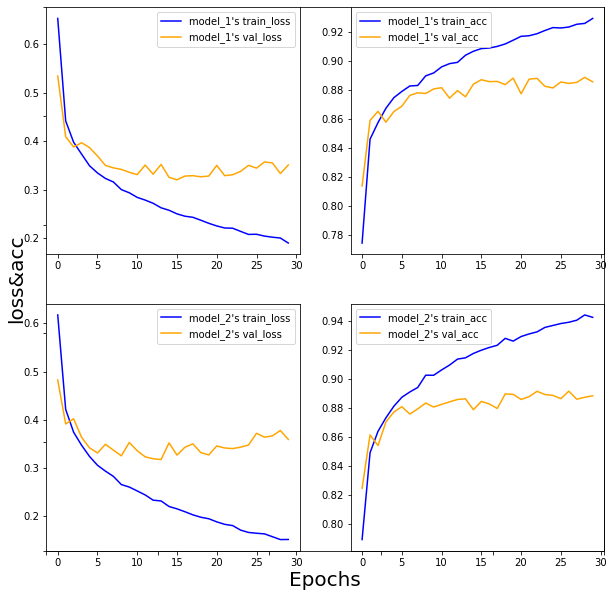

In [80]:
# 위의 함수는 아마 앞으로 계속 활용하려고 일반화해서 코드를 짠듯
# 그런데 상당히 복잡하고 처음보는 사람은 이해하기 힘들 수 있음
# 좀 더 초보적으로 시각화 진행해보기

fig = plt.figure(figsize=(10,10))

hist_1 = history_1.history
hist_2 = history_2.history
epochs = range(30)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Epochs', fontsize=20, labelpad=20)
ax.set_ylabel('loss&acc', fontsize=20, labelpad=20)
ax.tick_params(labeltop=False, labelbottom=False, labelleft=False, labelright=False)

ax = fig.add_subplot(2,2,1)
ax.plot(epochs, hist_1['loss'], c='b', label="model_1's train_loss")
ax.plot(epochs, hist_1['val_loss'], c='orange', label="model_1's val_loss")
ax.legend()

ax = fig.add_subplot(2,2,2)
ax.plot(epochs, hist_1['accuracy'], c='b', label="model_1's train_acc")
ax.plot(epochs, hist_1['val_accuracy'], c='orange', label="model_1's val_acc")
ax.legend()

ax = fig.add_subplot(2,2,3)
ax.plot(epochs, hist_2['loss'], c='b', label="model_2's train_loss")
ax.plot(epochs, hist_2['val_loss'], c='orange', label="model_2's val_loss")
ax.legend()

ax = fig.add_subplot(2,2,4)
ax.plot(epochs, hist_2['accuracy'], c='b', label="model_2's train_acc")
ax.plot(epochs, hist_2['val_accuracy'], c='orange', label="model_2's val_acc")
ax.legend()

plt.show()